Problem : Predict the sale price of real estate properties based on various features, including location, size, age of the property, and additional attributes like the number of bathrooms, proximity to major roads, and amenities.  

Task:
Build a linear regression model (or an alternative like Ridge regression or Lasso) to predict the sale price based on these features.

Preprocess the data: handle missing values, scale the data, encode categorical variables.

Evaluate the model using appropriate metrics such as Mean Squared Error (MSE), R², and Root Mean Squared Error (RMSE).


Loading the packages:


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mat
from sklearn.linear_model import LinearRegression
import statsmodels.api as sat
import seaborn as sns
sns.set()
from IPython.display import display

Load the data:

In [40]:
data = pd.read_csv('/Users/sazid/Downloads/python file/real_estate_prices.csv')

In [52]:

display(data.head(500))

Size  Bedrooms  Bathrooms  Year_Built Neighborhood  Proximity_to_Road  \
0    1360         3          2        1986       Suburb           4.842678   
1    4272         2          3        1930  Countryside           2.420945   
2    3592         5          3        1937  Countryside           2.928916   
3     966         5          2        1989     Downtown           7.047824   
4    4926         2          3        1961  Countryside           8.629065   
5    3944         3          2        1905       Suburb           7.985241   
6    3671         3          3        2022       Suburb           4.871312   
7    3419         4          3        1917  Countryside           6.090359   
8     630         2          3        1976     Downtown           9.626706   
9    2185         3          2        1967     Downtown           1.401829   
10   1269         2          1        1962  Countryside           3.450002   
11   2891         5          1        1963       Suburb           7.113269   
12   2933         3          2        1962     Downtown           4.608755   
13   1684         3          3        1955     Downtown           0.416897   
14   3885         5          2        1972     Downtown           9.137615   
15   4617         4          2        1953  Countryside           7.131853   
16   3404         2          3        1939       Suburb           2.083045   
17    974         2          3        1969       Suburb           2.876997   
18   1582         2          1        1908  Countryside           1.754467   
19   3058         2          2        1940     Downtown           4.050755   
20   2547         1          1        1955     Downtown           5.716266   
21   3247         5          2        1988       Suburb           3.102896   
22   1475         4          1        1903     Downtown           7.785753   
23   2306         5          1        1920     Downtown           8.328851   
24    689         2          2        1963     Downtown           8.297918   
25   3234         1          2        2018     Downtown           2.222318   
26   3505         1          3        1973       Suburb           4.957410   
27   2399         5          2        2019     Downtown           0.995407   
28   1767         3          2        1998  Countryside           5.369140   
29   2028         4          1        1952       Suburb           3.408651   
30   3702         1          2        1982  Countryside           8.545605   
31   4056         2          1        1947     Downtown           0.240505   
32   4390         3          3        2001     Downtown           2.091386   
33   1146         4          1        1920       Suburb           2.998512   
34   3388         2          1        1904  Countryside           6.888309   
35   2935         5          1        2011     Downtown           4.772144   
36   1100         1          2        1983       Suburb           8.719249   
37   2863         5          2        1991  Countryside           7.357166   
38   2561         3          1        1916     Downtown           2.238388   
39    741         1          2        1986       Suburb           4.016571   
40   2541         2          2        1954  Countryside           6.758263   
41   3324         3          3        1928       Suburb           5.226763   
42   3112         4          1        1999     Downtown           9.772138   
43   1863         2          2        1987     Downtown           4.288467   
44   1978         4          3        2021  Countryside           9.966178   
45   3056         1          3        1952  Countryside           7.955563   
46   1275         4          2        1916       Suburb           4.792551   
47   4514         1          2        1982       Suburb           6.100195   
48    534         4          3        2005     Downtown           5.558169   
49   3652         5          3        2015       Suburb           2.182248   
50   2455         5        

In [46]:
data.describe(include='all')

Size       Bedrooms      Bathrooms     Year_Built  \
count   100000.000000  100000.000000  100000.000000  100000.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean      2751.586000       2.997050       2.001380    1960.901350   
std       1300.478555       1.414066       0.817621      35.548326   
min        500.000000       1.000000       1.000000    1900.000000   
25%       1625.000000       2.000000       1.000000    1930.000000   
50%       2755.000000       3.000000       2.000000    1961.000000   
75%       3876.000000       4.000000       3.000000    1992.000000   
max       4999.000000       5.000000       3.000000    2022.000000   

       Neighborhood  Proximity_to_Road Public_Transport    Walkability  \
count        100000      100000.000000           100000  100000.000000   
unique            3                NaN                2            NaN   
top     Countryside                NaN               No            NaN   
freq          33589                NaN            50043            NaN   
mean            NaN           4.996881              NaN      49.803830   
std             NaN           2.885308              NaN      29.222556   
min             NaN           0.000311              NaN       0.000000   
25%             NaN           2.505889              NaN      24.000000   
50%             NaN           5.002310              NaN      50.000000   
75%             NaN           7.492334              NaN      75.000000   
max             NaN           9.999869              NaN     100.000000   

        Amenities_Gym  Amenities_Pool  Amenities_Garden  School_Rating  \
count   100000.000000   100000.000000     100000.000000  100000.000000   
unique            NaN             NaN               NaN            NaN   
top               NaN             NaN               NaN            NaN   
freq              NaN             NaN               NaN            NaN   
mean         0.299670        0.301940          0.301270       5.490150   
std          0.458116        0.459102          0.458812       2.871499   
min          0.000000        0.000000          0.000000       1.000000   
25%          0.000000        0.000000          0.000000       3.000000   
50%          0.000000        0.000000          0.000000       6.000000   
75%          1.000000        1.000000          1.000000       8.000000   
max          1.000000        1.000000          1.000000      10.000000   

           Crime_Rate          Price  
count   100000.000000  100000.000000  
unique            NaN            NaN  
top               NaN            NaN  
freq              NaN            NaN  
mean         4.979986   30237.675691  
std          2.880751   13467.088362  
min          0.000071  -22991.652767  
25%          2.487154   21111.650179  
50%          4.972641   30260.953890  
75%          7.469207   39345.563193  
max          9.999944   86591.127858

Checking if any null/missing values:

In [43]:
data.isnull().sum()


Size                 0
Bedrooms             0
Bathrooms            0
Year_Built           0
Neighborhood         0
Proximity_to_Road    0
Public_Transport     0
Walkability          0
Amenities_Gym        0
Amenities_Pool       0
Amenities_Garden     0
School_Rating        0
Crime_Rate           0
Price                0
dtype: int64

Checking for outliers:


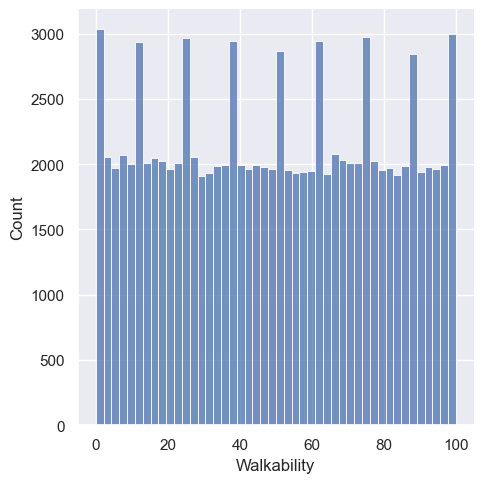

In [44]:
sns.displot(data['Walkability'])

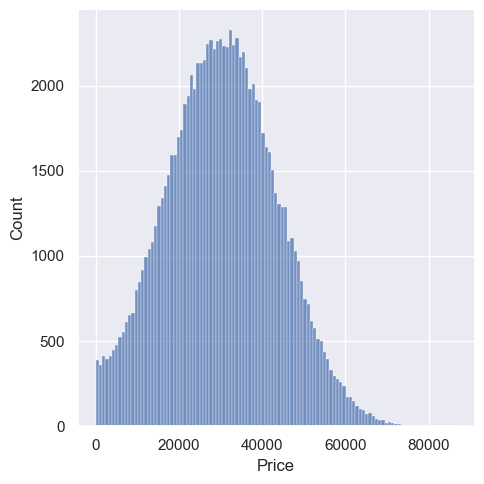

In [50]:
sns.displot(data['Price'])

Price has some negative values, using abs() function to make them pos.

In [49]:
data['Price'] = data['Price'].abs()

Checking data relation with price:

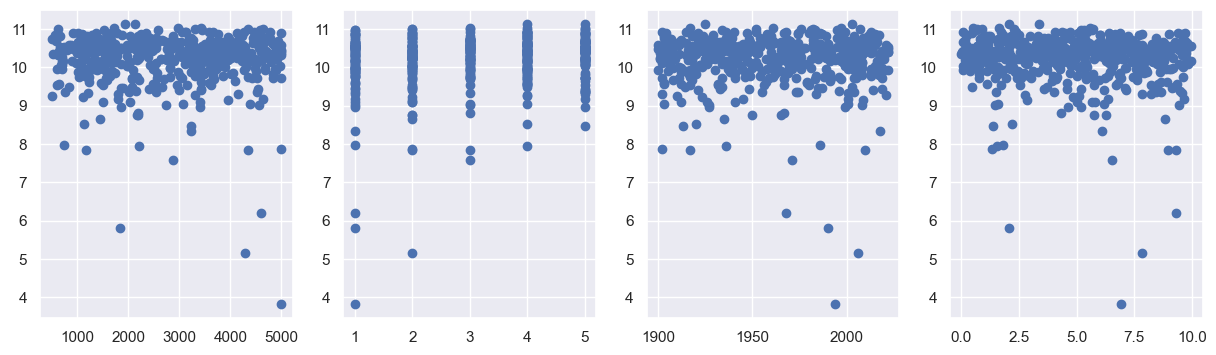

In [71]:
f,(ax1,ax2,ax3,ax4) = mat.subplots(1,4,figsize=(15,4))
ax1.scatter(data['Size'].head(500),np.log(data['Price'].head(500)))
ax2.scatter(data['Bedrooms'].head(500),np.log(data['Price'].head(500)))
ax3.scatter(data['Year_Built'].head(500),np.log(data['Price'].head(500)))
ax4.scatter(data['Crime_Rate'].head(500),np.log(data['Price'].head(500)))

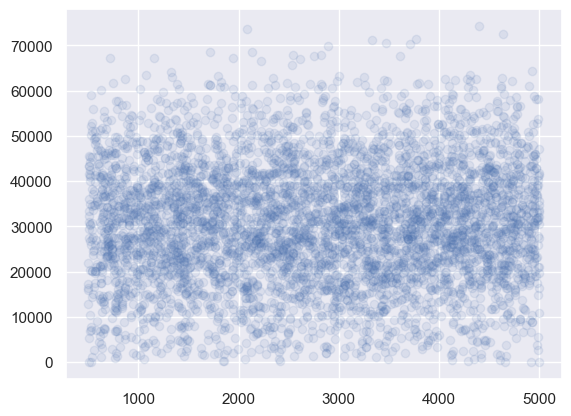

In [64]:
mat.scatter(data['Size'].head(5000),data['Price'].head(5000), alpha=.1)

No systematic relation between target and independent values so far. Though going to implement regression to see what happens.


Checking Multicollinearity :


In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data[['Size','Bedrooms','Year_Built','Crime_Rate','Walkability','Bathrooms','School_Rating']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [74]:
vif

VIF       features
0   5.468305           Size
1   5.484136       Bedrooms
2  25.420716     Year_Built
3   3.985591     Crime_Rate
4   3.901703    Walkability
5   6.977058      Bathrooms
6   4.649701  School_Rating

In [79]:
data = data.drop(['Year_Built'], axis=1)

Getting dummies:

In [82]:
data = pd.get_dummies(data, drop_first=True)

In [83]:
data

Size  Bedrooms  Bathrooms  Proximity_to_Road  Walkability  \
0      1360         3          2           4.842678           63   
1      4272         2          3           2.420945            6   
2      3592         5          3           2.928916           24   
3       966         5          2           7.047824           34   
4      4926         2          3           8.629065           62   
...     ...       ...        ...                ...          ...   
99995  2016         1          3           2.314621           75   
99996  2988         3          1           6.943341           75   
99997   727         1          1           1.710948           98   
99998  1489         1          2           9.583906           75   
99999  4125         2          1           1.004474           77   

       Amenities_Gym  Amenities_Pool  Amenities_Garden  School_Rating  \
0                  0               1                 1              6   
1                  0               1                 0              7   
2                  0               0                 0              7   
3                  1               0                 1              9   
4                  0               0                 0              1   
...              ...             ...               ...            ...   
99995              1               0                 0             10   
99996              0               0                 1              4   
99997              0               1                 1              3   
99998              0               0                 0              7   
99999              0               1                 0              9   

       Crime_Rate         Price  Neighborhood_Downtown  Neighborhood_Suburb  \
0        1.997183  34845.744769                  False                 True   
1        7.993794  20394.706316                  False                False   
2        4.891733  38717.974930                  False                False   
3        8.270223  37419.692205                   True                False   
4        1.864220  43230.176166                  False                False   
...           ...           ...                    ...                  ...   
99995    8.085877  20197.641413                  False                False   
99996    9.879187  34105.511778                  False                 True   
99997    6.097416  29308.117287                  False                 True   
99998    7.220216  28669.706929                  False                 True   
99999    8.066280  36640.893626                  False                False   

       Public_Transport_Yes  
0                     False  
1                      True  
2                     False  
3                      True  
4                     False  
...                     ...  
99995                 False  
99996                  True  
99997                  True  
99998                  True  
99999                 False  

[100000 rows x 14 columns]

Spliting the data:


In [86]:
target = data['Price']

inputs = data.drop(['Price'], axis =1)

Normalizing:

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

scaled_inputs = scaler.transform(inputs)

Train test split

In [89]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_inputs,target, test_size=.2, random_state=3)

Training:


In [91]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

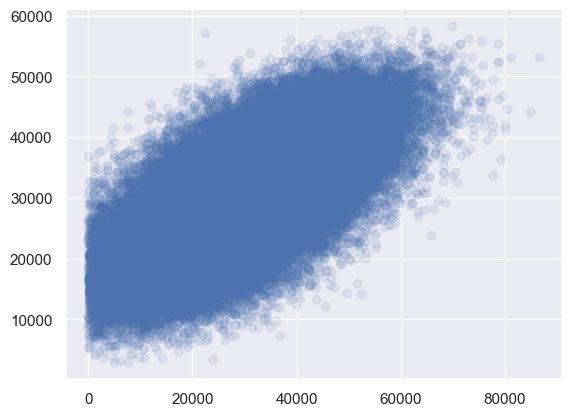

In [93]:
y_hat_train = reg.predict(x_train)
mat.scatter(y_train,y_hat_train, alpha = .1)

In [95]:
reg.coef_

array([ 1.12974159e+02,  1.39218858e+03,  1.17304127e+03,  5.63679290e+03,
        5.76993342e+03,  7.46668608e+00, -7.44055195e+00,  2.73333598e+01,
        2.78536936e+03, -1.41445315e+03,  2.10445344e+01,  1.26528825e+00,
       -8.53199941e+00])

In [97]:
reg.score(x_train,y_train)

0.4439218405324522

In [100]:
inputs.columns

Index(['Size', 'Bedrooms', 'Bathrooms', 'Proximity_to_Road', 'Walkability',
       'Amenities_Gym', 'Amenities_Pool', 'Amenities_Garden', 'School_Rating',
       'Crime_Rate', 'Neighborhood_Downtown', 'Neighborhood_Suburb',
       'Public_Transport_Yes'],
      dtype='object')

In [101]:
frame = pd.DataFrame()


In [102]:
frame['Features']=inputs.columns

In [104]:
frame['Coef values']=reg.coef_

In [105]:
frame

Features  Coef values
0                    Size   112.974159
1                Bedrooms  1392.188576
2               Bathrooms  1173.041268
3       Proximity_to_Road  5636.792899
4             Walkability  5769.933419
5           Amenities_Gym     7.466686
6          Amenities_Pool    -7.440552
7        Amenities_Garden    27.333360
8           School_Rating  2785.369358
9              Crime_Rate -1414.453154
10  Neighborhood_Downtown    21.044534
11    Neighborhood_Suburb     1.265288
12   Public_Transport_Yes    -8.531999

In [117]:
y_hat_test = reg.predict(x_test)
x= pd.DataFrame(y_hat_test, columns=['Predict'])
x['Target_test']= y_test.reset_index(drop=True)

x['Residual']=x['Target_test']-x['Predict']
x['%']= np.absolute(x['Residual']/x['Target_test']*100)

pd.options.display.max_rows = None
x.sort_values(by=['%'])

Predict   Target_test      Residual              %
10306  27814.817529  27814.410691     -0.406838       0.001463
13943  47118.717769  47120.719472      2.001703       0.004248
4743   34915.073951  34916.691338      1.617387       0.004632
5229   25472.999370  25470.702770     -2.296600       0.009017
18867  43045.696372  43050.524024      4.827652       0.011214
15887  38226.226450  38230.522238      4.295788       0.011237
15182  37715.050869  37719.514972      4.464103       0.011835
19832  38131.364426  38136.599952      5.235527       0.013728
2090   42779.776210  42773.411261     -6.364949       0.014881
7854   45358.320585  45367.946294      9.625709       0.021217
6418   36589.463587  36598.136619      8.673032       0.023698
6710   48894.060421  48906.352099     12.291678       0.025133
13391  16256.041197  16251.915636     -4.125561       0.025385
7667   40768.480678  40757.554559    -10.926118       0.026808
14159  34457.790112  34446.995037    -10.795075       0.031338
9074   21628.958633  21636.111973      7.153340       0.033062
4608   35929.224867  35916.778177    -12.446690       0.034654
10942  22195.516089  22205.485892      9.969803       0.044898
2107   38357.132487  38374.902388     17.769901       0.046306
14184  43098.443538  43118.558563     20.115025       0.046651
3938   38091.579394  38110.684495     19.105101       0.050131
10149  27314.841152  27300.973966    -13.867186       0.050794
5703   42178.354734  42156.347827    -22.006907       0.052203
17747  34138.755245  34156.829925     18.074679       0.052917
12463  40168.147112  40146.624069    -21.523043       0.053611
14508  29177.934174  29194.722758     16.788584       0.057506
16538  35918.993054  35941.195902     22.202848       0.061775
3833   16709.841759  16721.333014     11.491255       0.068722
13412  32672.488509  32695.707906     23.219396       0.071017
12835  25504.482691  25523.191812     18.709121       0.073302
18610  43126.883344  43159.116648     32.233304       0.074685
19244  29678.398278  29700.939099     22.540821       0.075893
16460  23530.733422  23548.632127     17.898706       0.076007
8486   29788.660521  29812.500724     23.840203       0.079967
18478  48364.759805  48405.265000     40.505195       0.083679
7345   38103.442070  38068.849801    -34.592269       0.090868
18393  39576.533982  39539.188789    -37.345193       0.094451
4002   22293.162831  22314.240394     21.077563       0.094458
13116  27983.670822  27957.084629    -26.586192       0.095096
4007   24113.052272  24089.967806    -23.084467       0.095826
10531  26391.865581  26418.109040     26.243459       0.099339
19201  38701.731592  38663.293060    -38.438532       0.099419
15509  33450.148843  33483.471159     33.322317       0.099519
15500  33727.952911  33694.213685    -33.739226       0.100134
11186  27238.108645  27209.928422    -28.180223       0.103566
4691   37544.613124  37505.709063    -38.904061       0.103728
12254  42357.151226  42312.593586    -44.557640       0.105306
2064   28118.454829  28088.548533    -29.906296       0.106471
17990  34256.653059  34293.916383     37.263324       0.108659
13089  35671.874913  35632.607199    -39.267714       0.110202
16086  26001.766199  26030.840545     29.074346       0.111692
19561  28347.493674  28315.175894    -32.317780       0.114136
6735   37407.509967  37452.078751     44.568783       0.119002
72     41862.034673  41811.839691    -50.194982       0.120050
17425  30640.497458  30678.071064     37.573606       0.122477
17289  31652.936186  31692.019809     39.083624       0.123323
2378   22493.979621  22522.055044     28.075423       0.124657
15864  34912.764334  34956.734214     43.969879       0.125784
148    35766.718763  35812.340348     45.621585       0.127391
17156  20163.504549  20137.373387    -26.131163       0.129765
2359   39033.478324  39087.312599     53.834275       0.137728
16530  29151.920592  29192.214510     40.293918       0.138030
15103  30051.062236  30007.577876    -43.48

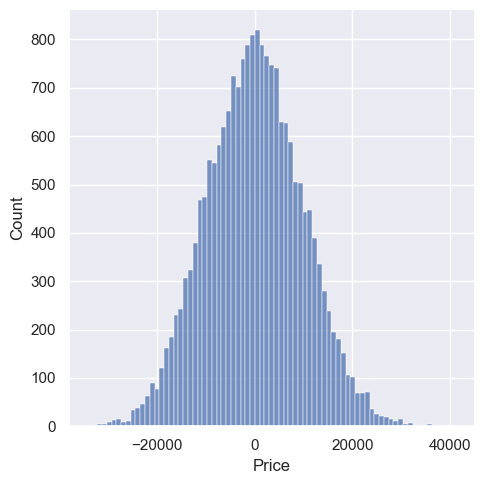

In [115]:
sns.displot(y_test-y_hat_test)

In [116]:
x['%'].describe()

count     20000.000000
mean         90.533066
std        2113.714540
min           0.001463
25%          10.066920
50%          21.626233
75%          39.253162
max      269075.878714
Name: %, dtype: float64

This model's residual mean is 90% !!!  which is very high. As this model was from non relational synthesis data, so this is what we got.


In [118]:
from scipy.stats import pearsonr

# Assuming you have two pandas Series or arrays: x and y
corr_coefficient, p_value = pearsonr(data['Price'], data['Size'])

print(f"Correlation Coefficient: {corr_coefficient}")
print(f"P-Value: {p_value}")

Correlation Coefficient: 0.012009935446406035
P-Value: 0.0001458891868738933


Why can a very weak correlation (like 0.012) still be statistically significant (very low p-value)?
The key reason is: sample size.